In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
def get_config():
    with open("config.yml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_ph = pd.read_csv(config['ph'])
df_plaque = pd.read_csv(config['plaque'])
df_gum_bleeding = pd.read_csv(config['gum_bleeding'])
df_lifesum = pd.read_csv(config['lifesum'])

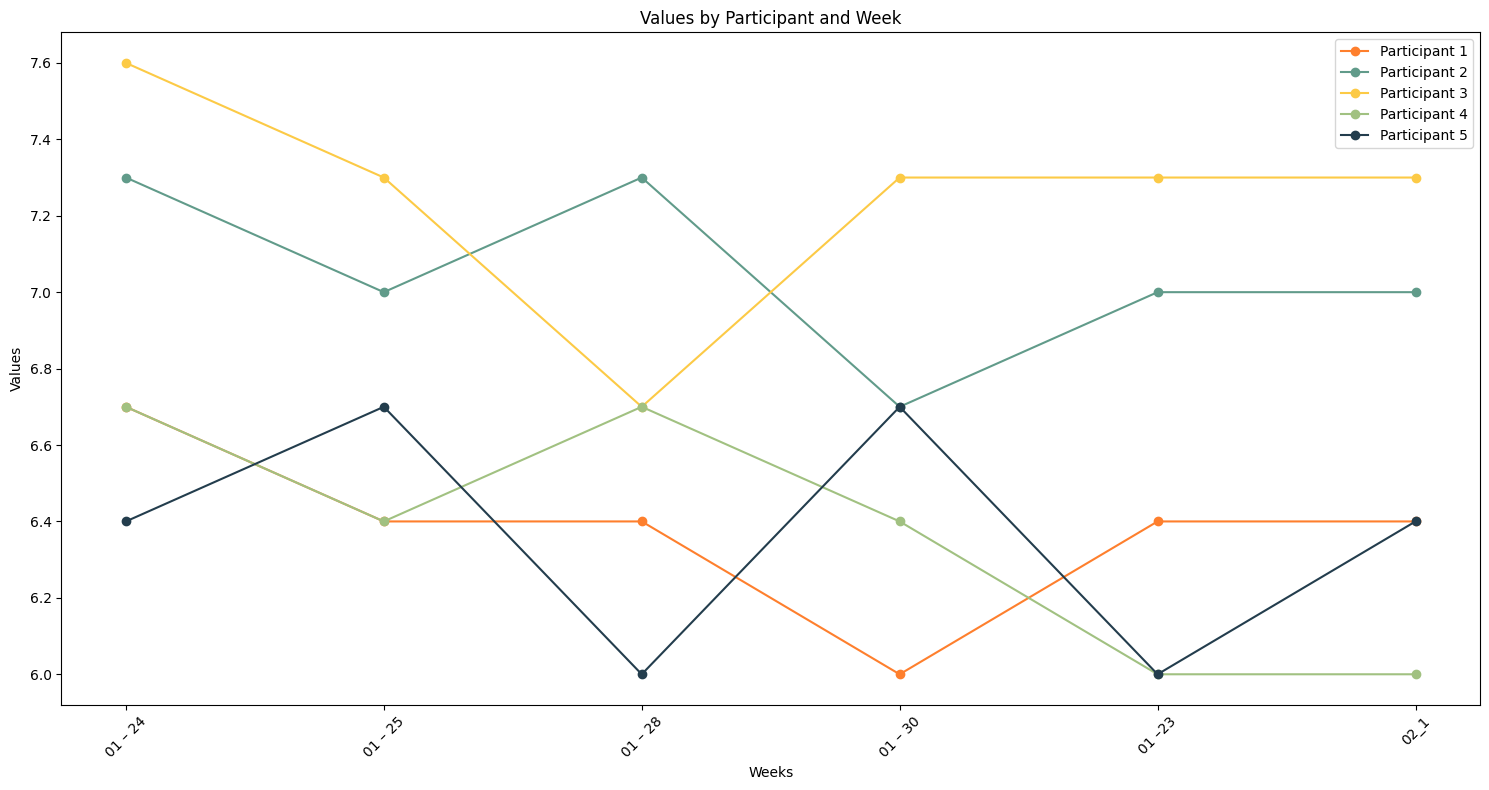

In [11]:
# Specified colors (corrected hex codes)
colors = ['#FE7F2D', '#619B8A', '#FCCA46', '#A1C181', '#233D4D']
df_ph_cleaned = df_ph.dropna()

# Sort the DataFrame by the 'Weeks' column
df_ph_sorted = df_ph_cleaned.sort_values(by='Weeks')

# Assuming df_ph_sorted is the correct DataFrame
weeks = df_ph_sorted['Weeks']
participants = df_ph_sorted.columns[1:]

fig, ax = plt.subplots(figsize=(15, 8))

# Plotting lines for each participant with specified colors
for i, participant in enumerate(participants):
    ax.plot(weeks, df_ph_sorted[participant], marker='o', label=participant, color=colors[i])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Weeks')
ax.set_ylabel('Values')
ax.set_title('Values by Participant and Week')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Convert 'Yes'/'No' to 1/0
df_gum_bleeding.replace({'Yes': 1, 'yes': 1, 'No': 0, 'NO': 0, 'no': 0}, inplace=True)

# Create violin plot for each participant with specified colors
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_gum_bleeding, palette=colors)
plt.xlabel('Participants')
plt.ylabel('Count of Yes Responses')
plt.title('Violin Plot of Yes Responses for Each Participant')
plt.xticks(rotation=45)
plt.show()


NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

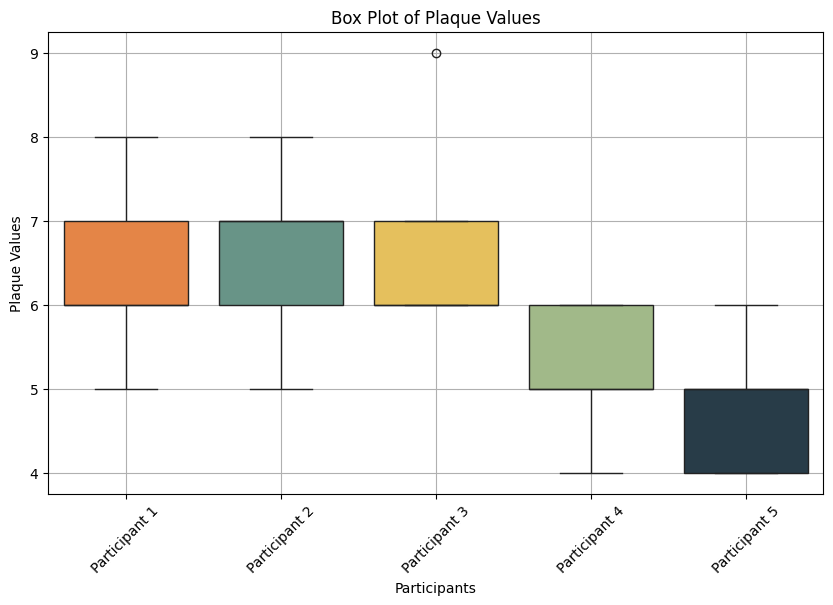

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plaque, palette=colors)
plt.title('Box Plot of Plaque Values')
plt.xlabel('Participants')
plt.ylabel('Plaque Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
def plot_lactobacillus_consumption_avg(df_lifesum):
    participants = df_lifesum.columns[1:]

    # Replace null values with 0
    df_lifesum.fillna(0, inplace=True)

    # Compute average consumption for each person
    avg_consumption = df_lifesum.mean()

    plt.figure(figsize=(10, 6))
    plt.bar(participants, avg_consumption[1:], color='skyblue')  # Plotting bar chart, excluding the first value
    plt.title('Average Consumption of Lactobacillus for Each Person')
    plt.xlabel('Participants')
    plt.ylabel('Average Consumption')
    plt.xticks(rotation=45)
    plt.grid(axis='y')  # Add gridlines along y-axis
    plt.show()

# Plot average consumption of lactobacillus for each person
plot_lactobacillus_consumption_avg(df_lifesum)

TypeError: Could not convert ['01 – 2201 –2301 – 2401 – 2501 – 2601 – 2701 – 2801 – 2901 – 3001 – 3102_102_ 202_302_402_502_6'] to numeric